In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modules.utilityFunctions import plotMomentScaling, fitMoments, plotCorrelationMeanSize, cumulative_data, susmanProcessing, autocorrelationExponential
from scipy.stats import linregress
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit

In [3]:
dataPath = Path.cwd().parents[1] / 'data'
simulationPath: Path = dataPath / 'simulationHaskell' / 'simulation2'

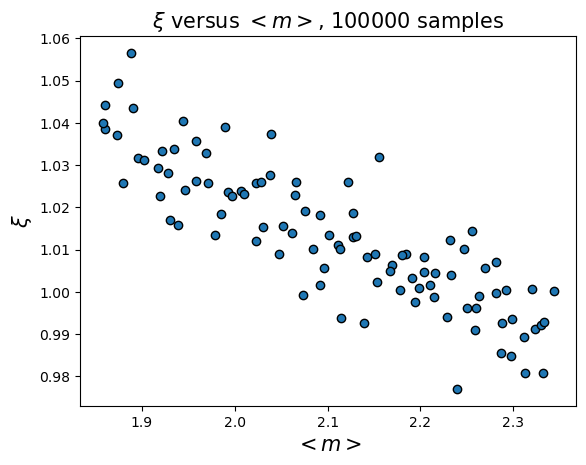

In [4]:
plotCorrelationMeanSize(simulationPath, suffix='Full')
_ = plt.title('$\\xi$ versus $<m>$, 100000 samples', fontsize=15)

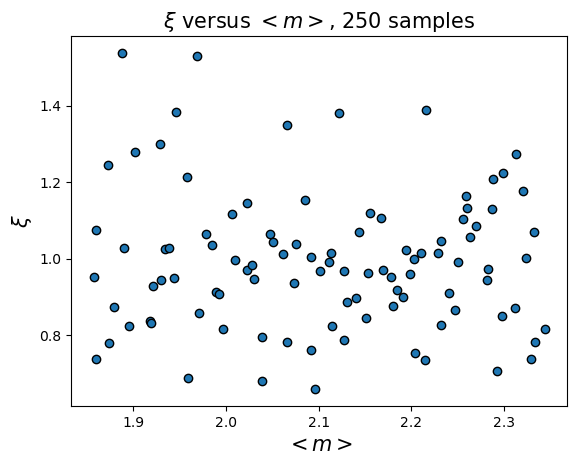

In [5]:
plotCorrelationMeanSize(simulationPath, suffix='250')
_ = plt.title('$\\xi$ versus $<m>$, 250 samples', fontsize=15)

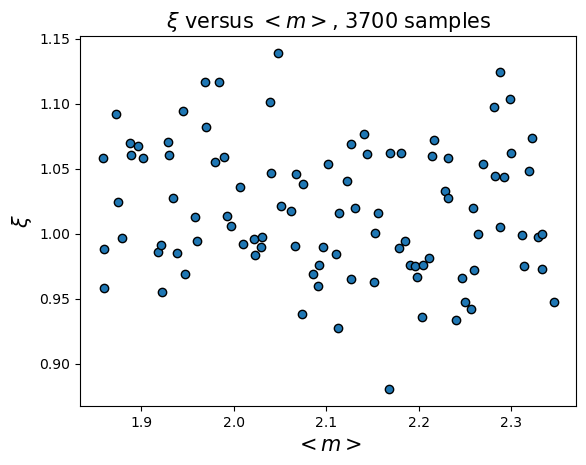

In [6]:
plotCorrelationMeanSize(simulationPath, suffix='3700')
_ = plt.title('$\\xi$ versus $<m>$, 3700 samples', fontsize=15)

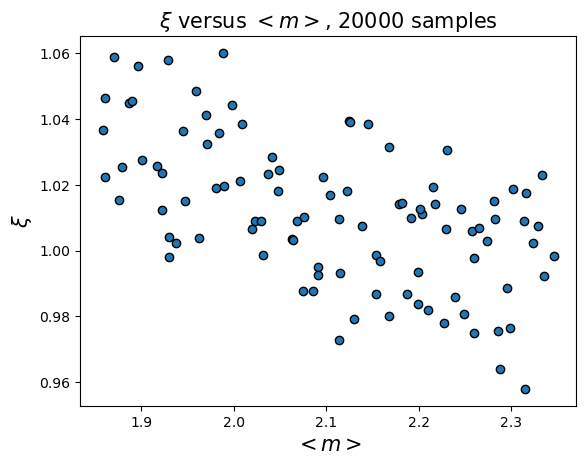

In [7]:
plotCorrelationMeanSize(simulationPath, suffix='20000')
_ = plt.title('$\\xi$ versus $<m>$, 20000 samples', fontsize=15)

# All autocorrelations real data


In [8]:
susmanPath: Path = dataPath / 'realData' / 'Susman' / 'longLineages'
tanouchi25Path = dataPath / 'realData' / 'Tanouchi' / 'Tanouchi25'
tanouchi37Path = dataPath / 'realData' / 'Tanouchi' / 'Tanouchi37'
correlationsSusman = pd.read_csv(
    susmanPath / 'correlationParameters.csv')['correlation']
correlationsTanouchi = pd.read_csv(
    susmanPath / 'correlationParameters.csv')['correlation']
correlationsSusman = pd.read_csv(
    susmanPath / 'correlationParameters.csv')['correlation']

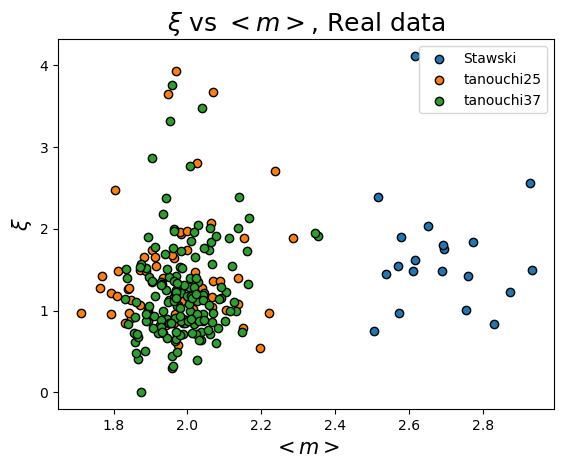

In [9]:
for path, name in zip([susmanPath, tanouchi25Path, tanouchi37Path], ['Stawski', 'tanouchi25', 'tanouchi37']):
    df = pd.read_csv(path / 'correlationParameters.csv')
    means = np.load(path / 'momentScaling' / 'allMeans.npy')[0, :]
    plt.scatter(means, df['correlation'], label=name, edgecolor='black')
plt.xlabel('$<m>$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('$\\xi$ vs $<m>$, Real data', fontsize=18)
_ = plt.legend()

## New Estimates Simulations


,linear,log
k=2,2.429781,1.993154
k=3,4.586772,2.977033


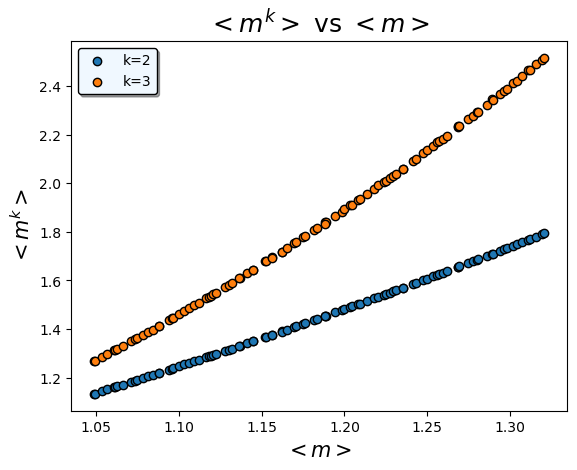

In [10]:
furtheCriticalPath = dataPath / 'twoTrait'/'proteinSimulationFurtherCritical'
plotMomentScaling(furtheCriticalPath / 'momentScaling')
fitDictionary = fitMoments(furtheCriticalPath / 'momentScaling')
pd.DataFrame(fitDictionary)

,linear,log
k=2,4.434589,2.006414
k=3,15.693777,2.927243


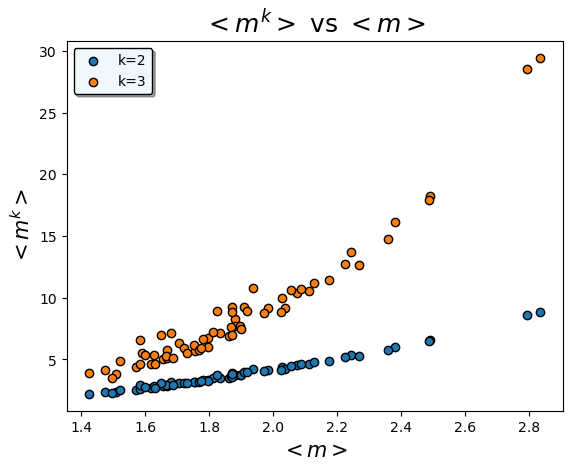

In [11]:
tanouchiML = dataPath / 'ML'/'timeGan'/'tanouchi25'
plotMomentScaling(tanouchiML / 'momentScaling')
fitDictionary = fitMoments(tanouchiML / 'momentScaling')
pd.DataFrame(fitDictionary)

## Noisy linear map

Slope Stawski = 0.97 ± 0.03
Slope tanouchi25 = 1.12 ± 0.02
Slope tanouchi37 = 0.98 ± 0.02


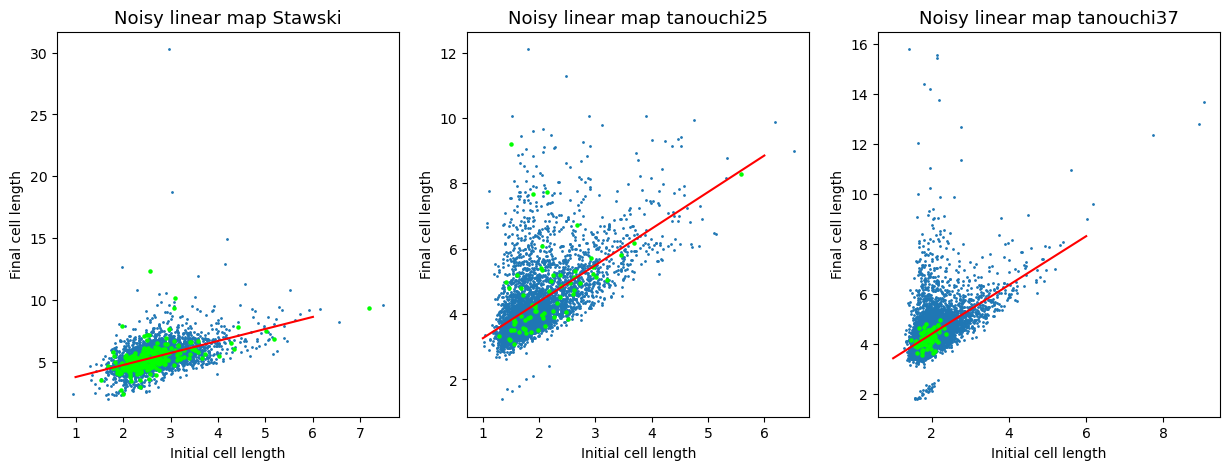

In [12]:
fig, ax_ = plt.subplots(1, 3, figsize=(15, 5))

for ax, path, name in zip(ax_.flatten(), [susmanPath / 'susmanDataLL.csv', tanouchi25Path / 'Tanouchi25C.csv', tanouchi37Path / 'Tanouchi37C.csv'], ['Stawski', 'tanouchi25', 'tanouchi37']):
    df = pd.read_csv(path)
    df2 = df[df['lineage_ID'] == 15]
    ax.scatter(df['length_birth'], df['length_final'], s = 1)
    ax.scatter(df2['length_birth'], df2['length_final'], s = 5, color = 'lime')
    ax.set_title('Noisy linear map ' + name, fontsize = 13)
    ax.set_xlabel('Initial cell length', fontsize = 10)
    ax.set_ylabel('Final cell length', fontsize = 10)
    result = linregress(df['length_birth'], df['length_final'])
    xAxis = np.linspace(1, 6, 1000)
    ax.plot(xAxis, xAxis*result.slope + result.intercept, color = 'red')
    print(f"Slope {name} = {result.slope:.2f} ± {result.stderr:.2f}")